In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def sigmoid(x):
  return 1/1+np.exp(-x)

def d_sigmoid(x):
  return sigmoid(x)(1-sigmoid(x))

# create variable used for prediction
hours_learning = np.linspace(1, 100, 100)

# probability of passing
weights = hours_learning / len(hours_learning)

# create variable we want to predict from hours_learning
pass_test = np.random.binomial(1, weights)

print('First five values')
print('\thours_learning:\t\t', hours_learning[:5])
print('\tweights:\t\t', weights[:5])
print('\tpass_test:\t\t', pass_test[:5])

First five values
	hours_learning:		 [1. 2. 3. 4. 5.]
	weights:		 [0.01 0.02 0.03 0.04 0.05]
	pass_test:		 [0 0 0 0 0]


In [8]:
x = hours_learning.reshape(-1,1)
y = pass_test

model = LogisticRegression()
model.fit(x,y)


LogisticRegression()

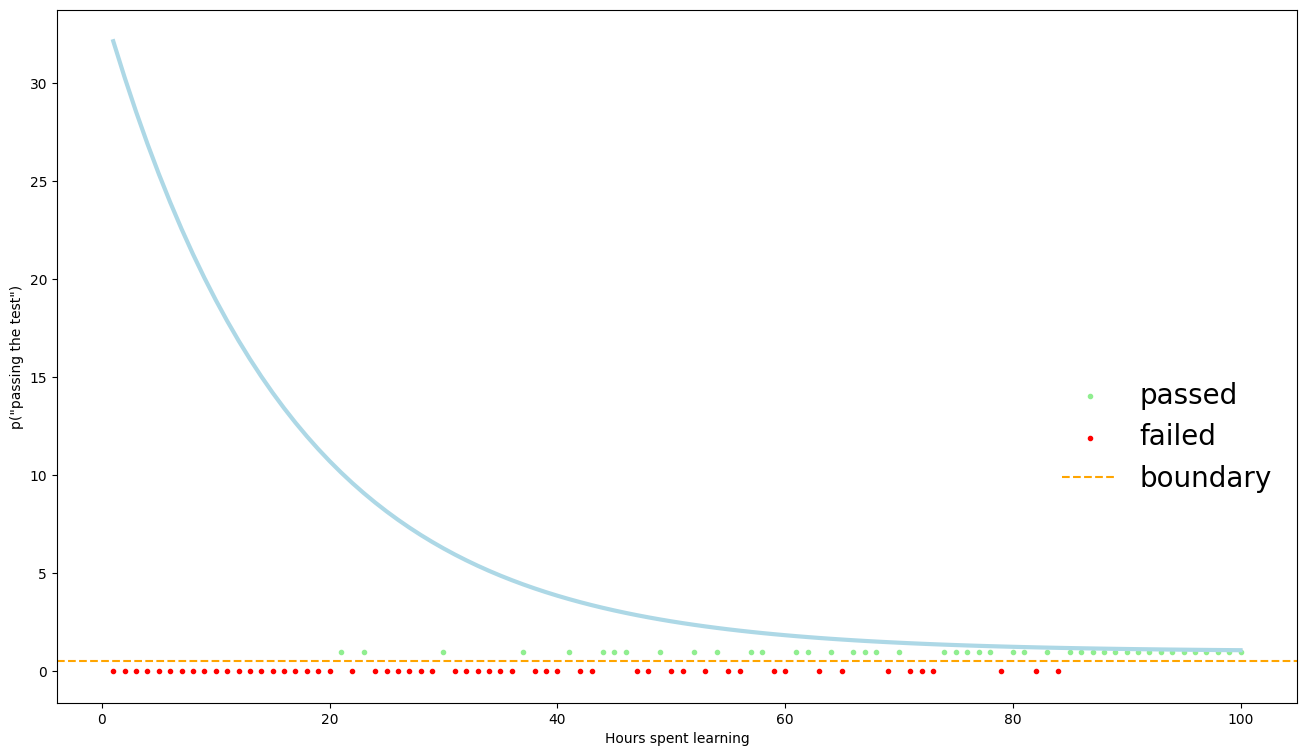

In [10]:
# use the model coefficients to draw the plot
pred = sigmoid(x * model.coef_[0] + model.intercept_[0])

fig = plt.figure(figsize=(16, 9))
plt.plot(x, pred, c="lightblue", linewidth=3.0)

plt.scatter(
    x[(y == 1).ravel()],
    y[(y == 1).ravel()],
    marker=".",
    c="lightgreen",
    linewidth=1.0,
    label="passed",
)

plt.scatter(
    x[(y == 0).ravel()],
    y[(y == 0).ravel()],
    marker=".",
    c="red",
    linewidth=1.0,
    label="failed",
)

plt.axhline(y=0.5, color="orange", linestyle="--", label="boundary")
plt.xlabel("Hours spent learning")
plt.ylabel('p("passing the test")')
plt.legend(frameon=False, loc="best", bbox_to_anchor=(0.5, 0.0, 0.5, 0.5), prop={'size': 20})
plt.show()

In [13]:
print(model.predict([[30]]))  # 30 hours spent learning will lead to a fail prediction

[0]


In [14]:
print(model.predict([[60]]))  # 60 hours spent learning will lead to a pass prediction

[1]
